In [1]:
## IMPORTS
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Display the first few rows to get a feel for the data
job_tweets_raw_df = pd.read_csv("../data/Job_Tweets.csv")
job_tweets_raw_df.head(10)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
5,1211792528388841473,2019-12-30 23:33:47+00:00,HireLive,We are #hiring Inside Sales Representative in ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
6,1211791693005099008,2019-12-30 23:30:28+00:00,HireLive,We are #hiring Community Service Counselor in ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
7,1211790931772477440,2019-12-30 23:27:26+00:00,HireLive,We are #hiring Outside Sales Representative in...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
8,1211789520473079809,2019-12-30 23:21:50+00:00,PRGWest,We are #hiring Workday HRIS Manager 19-00454 ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",Southern California,False,829,1015
9,1211788232620412929,2019-12-30 23:16:43+00:00,GhLisa,We are #hiring Restaurant Manager - Hourly Man...,"['hiring', 'jobs', 'Laurel']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Mississippi, USA",False,89,80


In [23]:
# Get a concise summary of the dataframe
print("---INFO:\n")
print(job_tweets_raw_df.info())

# Get the number of unique values for each column
print("\n---Number of unique values:\n",job_tweets_raw_df.nunique())

# See the shape of the dataframe
print("\n---Shape: ",job_tweets_raw_df.shape)

---INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                50000 non-null  int64 
 1   Timestamp         50000 non-null  object
 2   User              50000 non-null  object
 3   Text              50000 non-null  object
 4   Hashtag           40684 non-null  object
 5   Retweets          50000 non-null  int64 
 6   Likes             50000 non-null  int64 
 7   Replies           50000 non-null  int64 
 8   Source            50000 non-null  object
 9   Location          44011 non-null  object
 10  Verified_Account  50000 non-null  bool  
 11  Followers         50000 non-null  int64 
 12  Following         50000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 4.6+ MB
None

---Number of unique values:
 ID                  50000
Timestamp           46795
User                13715
Text               

<Axes: >

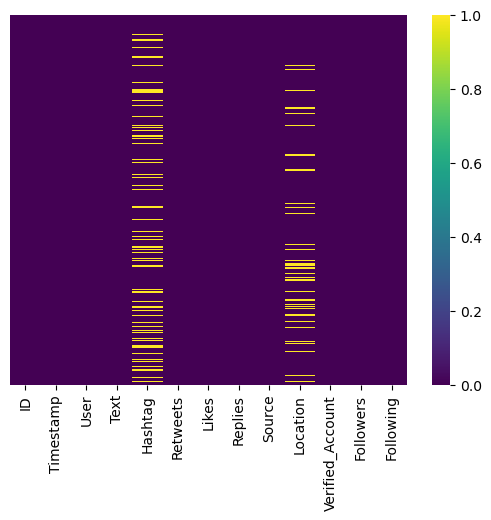

In [5]:
sns.heatmap(job_tweets_raw_df.isnull(),cmap="viridis",yticklabels=False,cbar=True)

In [24]:
# Check for missing values
print(job_tweets_raw_df.isnull().sum())

ID                     0
Timestamp              0
User                   0
Text                   0
Hashtag             9316
Retweets               0
Likes                  0
Replies                0
Source                 0
Location            5989
Verified_Account       0
Followers              0
Following              0
dtype: int64


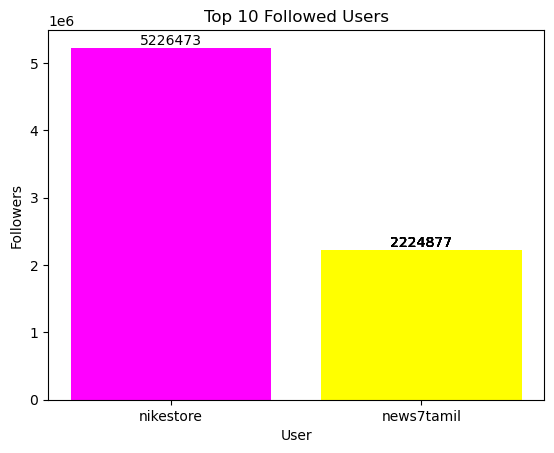

In [6]:
job_tweets_raw_df = job_tweets_raw_df.sort_values(by=['Followers'], ascending=False)
top_10 = job_tweets_raw_df.head(10)

colors = plt.cm.spring(np.linspace(0, 1, len(top_10)))
plt.bar(top_10['User'], top_10['Followers'], color=colors)
plt.xticks(rotation=0)
plt.xlabel('User')
plt.ylabel('Followers')
plt.title('Top 10 Followed Users')
for i in range(len(top_10)):
    plt.annotate(str(top_10.iloc[i]['Followers']), xy=(top_10.iloc[i]['User'], top_10.iloc[i]['Followers']), ha='center', va='bottom')

plt.show()

In [25]:
# Get summary statistics for numerical columns
print(job_tweets_raw_df.describe())

# Get summary statistics for categorical columns
print(job_tweets_raw_df.describe(include=['O']))


                 ID      Retweets         Likes       Replies     Followers  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   1.451833e+18      0.692100      1.347860      0.108920  5.511382e+03   
std    1.627261e+17      7.441484     17.527216      1.276483  6.770825e+04   
min    1.204098e+18      0.000000      0.000000      0.000000  0.000000e+00   
25%    1.331194e+18      0.000000      0.000000      0.000000  8.000000e+01   
50%    1.471224e+18      0.000000      0.000000      0.000000  2.980000e+02   
75%    1.605666e+18      0.000000      0.000000      0.000000  1.258000e+03   
max    1.645532e+18   1016.000000   1677.000000    175.000000  5.226473e+06   

           Following  
count   50000.000000  
mean     1961.965460  
std      5847.789338  
min         0.000000  
25%        94.000000  
50%       331.000000  
75%      1076.000000  
max    310791.000000  
                        Timestamp          User  \
count                       50

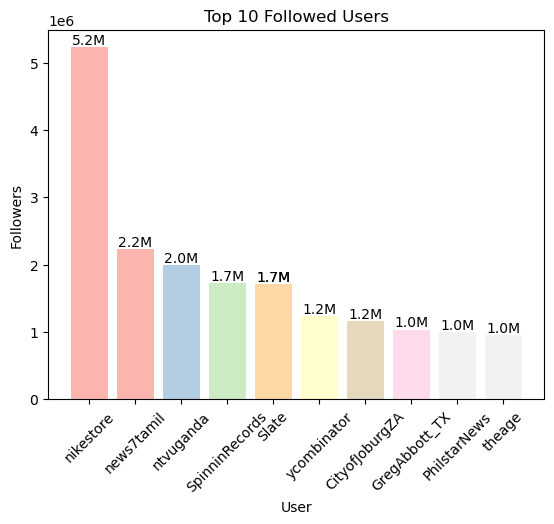

In [7]:
job_tweets_account_and_follower = job_tweets_raw_df[["User","Followers"]].drop_duplicates()
job_tweets_account_and_follower = job_tweets_account_and_follower.sort_values(by=['Followers'], ascending=False)
top_10 = job_tweets_account_and_follower.head(11)

colors = plt.cm.get_cmap('Pastel1', len(top_10))
plt.bar(top_10['User'], top_10['Followers'], color=colors(np.arange(len(top_10))))
plt.xticks(rotation=45)
plt.xlabel('User')
plt.ylabel('Followers')
plt.title('Top 10 Followed Users')
for i in range(len(top_10)):
    plt.annotate(str(round(top_10.iloc[i]['Followers']/1000000,1))+"M", xy=(top_10.iloc[i]['User'], top_10.iloc[i]['Followers']), ha='center', va='bottom')

plt.show()

In [26]:
# Count the number of tweets by user
print(job_tweets_raw_df['User'].value_counts())

# Count the number of tweets per location
print(job_tweets_raw_df['Location'].value_counts())

# Count the number of tweets containing each hashtag
print(job_tweets_raw_df['Hashtag'].value_counts())

cameroncraig       2513
GSGjobs            1267
sam5929            1073
AjuliaCareers      1046
Mascmedical         975
                   ... 
SouthwarkColl         1
NorthernDiverUK       1
dhardisty             1
deaconessnews         1
PragatiEmpower        1
Name: User, Length: 13715, dtype: int64
United States                     3504
USA                               2668
Dallas, TX                        1073
Fort Lauderdale, FL                979
Salt Lake City, UT                 977
                                  ... 
Shepton Mallet, England              1
Birr                                 1
Near a confluence of rivers.         1
Laguna Beach, CA                     1
Innovation Centre, Silverstone       1
Name: Location, Length: 5973, dtype: int64
['hiring', 'jobs', 'Houston']                                                                                                                                                               792
['job']                         

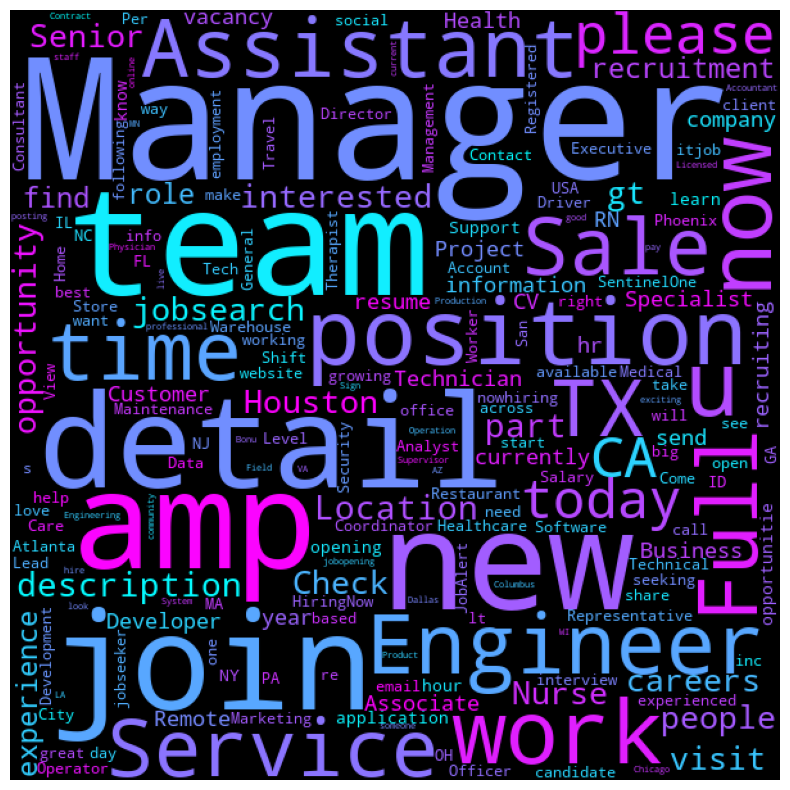

In [9]:
word_string=' '.join(job_tweets_raw_df['Text'].astype("str").values)
STOPWORDS.update(['Job Vacancy','We are Hiring',"We're Hiring",
                 "Job","CO","https","t","hiring","jobs",
                 "apply","looking","career","link","click"])
wordcloud = WordCloud(stopwords=STOPWORDS, 
                      collocations=False,
                      background_color ='Black',
                      min_font_size = 0.001,
                     colormap="cool",
                     width=600, height=600).generate(word_string)
plt.subplots(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

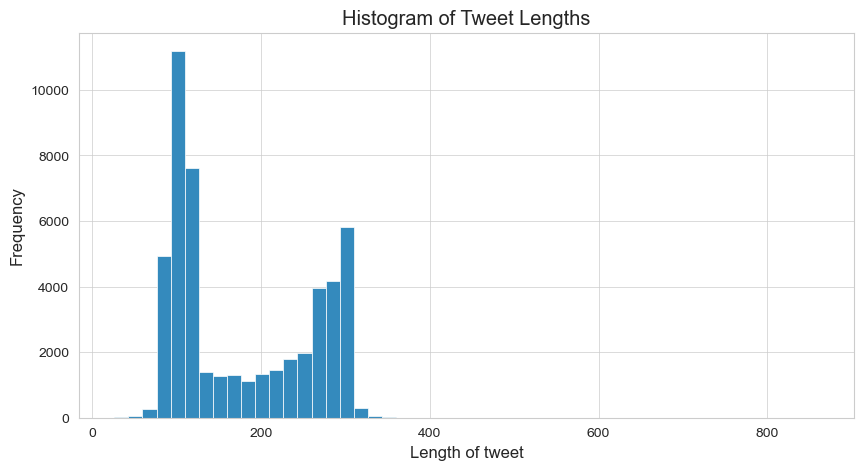

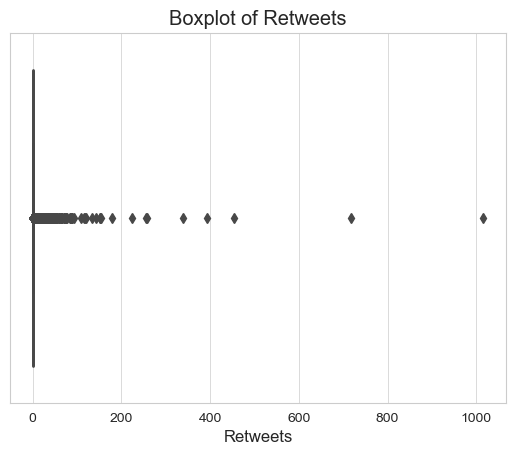

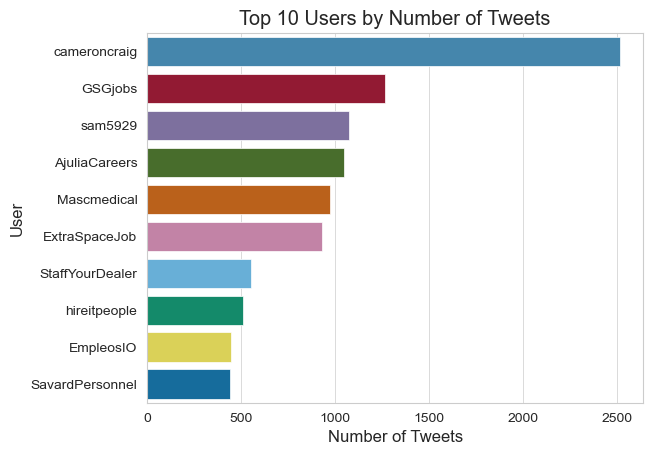

In [27]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histogram of tweet lengths
job_tweets_raw_df['Text'].str.len().hist(bins=50, figsize=(10,5))
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Length of tweet')
plt.ylabel('Frequency')
plt.show()

# Boxplot for retweets
sns.boxplot(x=job_tweets_raw_df['Retweets'])
plt.title('Boxplot of Retweets')
plt.show()

# Bar plot for top 10 users by number of tweets
top_users = job_tweets_raw_df['User'].value_counts().head(10)
sns.barplot(x=top_users, y=top_users.index)
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.show()


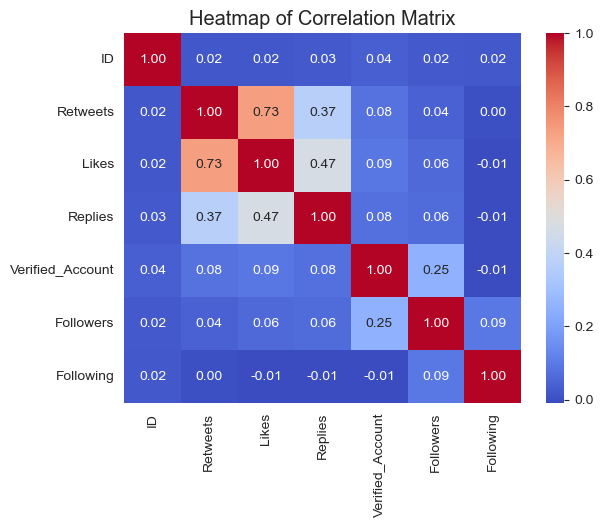

In [28]:
# Compute the correlation matrix for numerical variables
correlation_matrix = job_tweets_raw_df.corr()

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

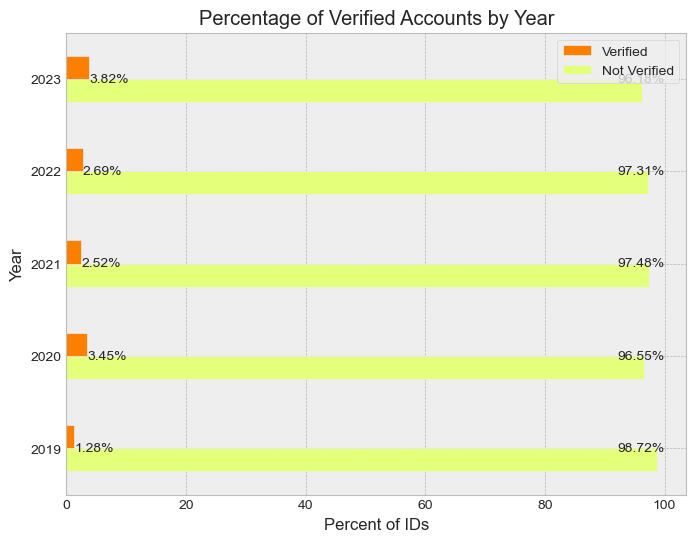

In [30]:
job_tweets_raw_df['Timestamp'] = pd.to_datetime(job_tweets_raw_df['Timestamp'])
job_tweets_raw_df['year'] = job_tweets_raw_df['Timestamp'].dt.year
job_tweets_raw_df['Verified_Account'] = job_tweets_raw_df['Verified_Account'].map({True: "Verified", False: "Not Verified"})
job_tweets_raw_df['Times_tamp'] = pd.to_datetime(job_tweets_raw_df.Timestamp, format='%Y-%m-%d %h:%M:%S')
job_tweets_raw_df.insert(loc=2, column='year_month', value=job_tweets_raw_df['Times_tamp'].map(lambda x: 100*x.year + x.month))
job_tweets_raw_df.insert(loc=3, column='month', value=job_tweets_raw_df.Times_tamp.dt.month)
job_tweets_raw_df.insert(loc=4, column='day', value=(job_tweets_raw_df.Times_tamp.dt.dayofweek)+1)
job_tweets_raw_df.insert(loc=5, column='hour', value=job_tweets_raw_df.Times_tamp.dt.hour)
# group the IDs by year and Verified_Account, and calculate counts and percentages
grouped = job_tweets_raw_df.groupby(['year', 'Verified_Account']).size().reset_index(name='counts')
grouped['percent'] = grouped['counts'] / grouped.groupby('year')['counts'].transform('sum') * 100

# pivot the data to create a dataframe with Verified and Not Verified as columns
pivot = grouped.pivot(index='year', columns='Verified_Account', values='percent')

# plot a stacked horizontal bar chart
ax = pivot.plot(kind='barh', stacked=False, cmap='Wistia', figsize=(8, 6))

# add annotations to the chart at the tip of the bars
for i in range(len(pivot)):
    verified_percent = pivot.iloc[i]['Verified']
    not_verified_percent = pivot.iloc[i]['Not Verified']
    ax.annotate(f"{verified_percent:.2f}%", xy=(verified_percent, i), ha='left', va='center')
    ax.annotate(f"{not_verified_percent:.2f}%", xy=(verified_percent + not_verified_percent, i), ha='right', va='center')

# reverse the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')

# set axis labels and title
plt.xlabel('Percent of IDs')
plt.ylabel('Year')
plt.title('Percentage of Verified Accounts by Year')

plt.show()

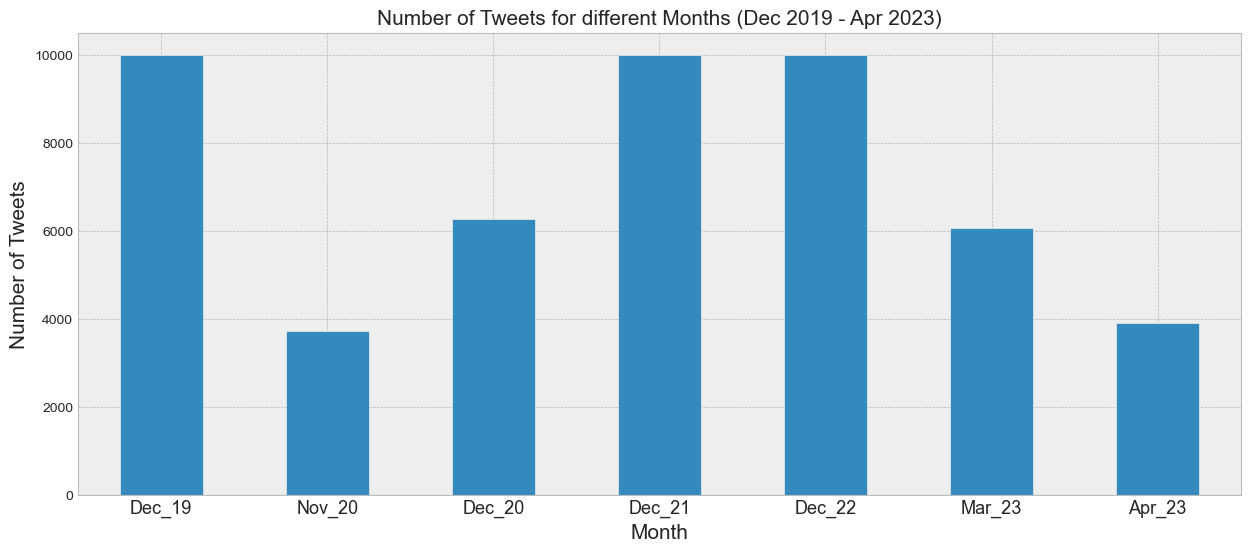

In [31]:
# Using bmh style for better visualization
plt.style.use('bmh')

# Using groupby to extract No. of Tweets year-monthwise
ax = job_tweets_raw_df.groupby('ID')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

# Labelling the X axis
ax.set_xlabel('Month',fontsize=15)

# Labelling the Y-axis
ax.set_ylabel('Number of Tweets',fontsize=15)

# Giving suitable title to the plot
ax.set_title('Number of Tweets for different Months (Dec 2019 - Apr 2023)',fontsize=15)

# Providing with X tick labels
ax.set_xticklabels(('Dec_19','Nov_20','Dec_20','Dec_21','Dec_22','Mar_23','Apr_23'), rotation='horizontal', fontsize=13)

plt.show()

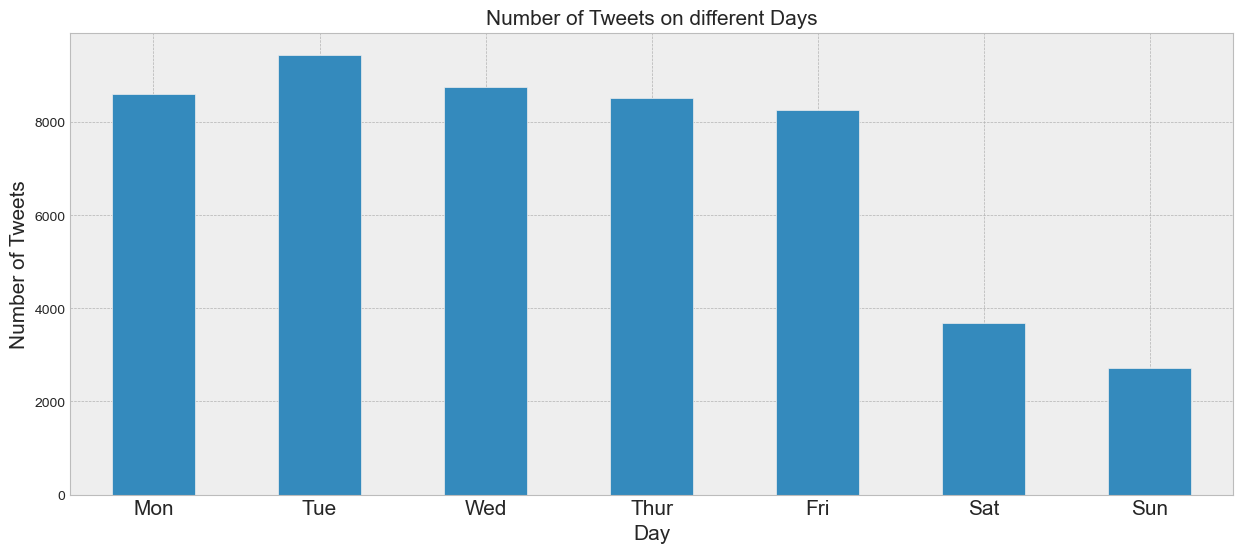

In [32]:
# Using groupby to count no. of Tweets daywise
ax = job_tweets_raw_df.groupby('ID')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

# Labelling X axis
ax.set_xlabel('Day',fontsize=15)

# Labelling Y axis
ax.set_ylabel('Number of Tweets',fontsize=15)

# Giving suitable title to the plot
ax.set_title('Number of Tweets on different Days',fontsize=15)

# Providing with X tick labels
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)

plt.show()

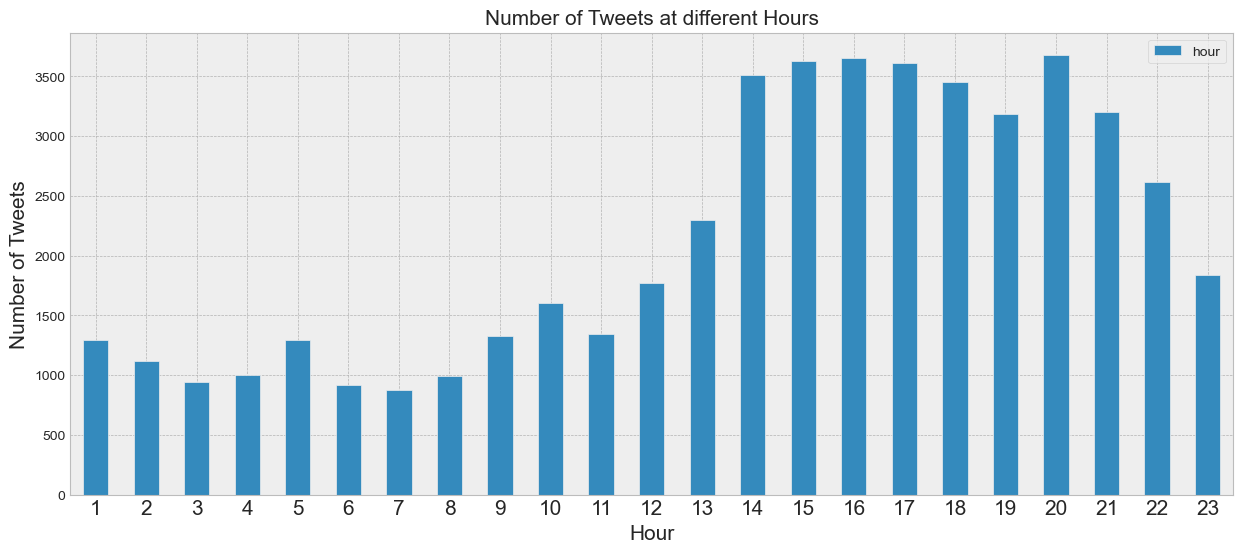

In [33]:
# Using groupby to count the no. of Tweets hourwise
grouped_data = job_tweets_raw_df.groupby(['ID'])['hour'].unique().value_counts().reset_index()
grouped_data = pd.DataFrame(grouped_data).sort_values(by="hour")
ax = grouped_data.iloc[1:].sort_values(by="index").plot(kind='bar',figsize=(15,6))

# Labelling X axis
ax.set_xlabel('Hour',fontsize=15)

# Labelling Y axis
ax.set_ylabel('Number of Tweets',fontsize=15)

# Giving suitable title to the plot
ax.set_title('Number of Tweets at different Hours',fontsize=15)

# Providing with X tick lables ( all orders are placed between 6 and 20 hour )
ax.set_xticklabels(range(1,24), rotation='horizontal', fontsize=15)
plt.show()


In [36]:
# Get the most retweeted text
most_retweeted_text = job_tweets_raw_df.Text[job_tweets_raw_df['Retweets'] == job_tweets_raw_df['Retweets'].max()]

# Print the results
print('The most retweeted tweet:', most_retweeted_text.iloc[0], "\n")

The most retweeted tweet: I want to help some amazing folks secure $80-100K+  jobs with our clients before Christmas so here's a thread on jobs we are hiring for as we close out 2021. Send resume to me (info in my bio). RT to change a creative's life. https://t.co/2AEmPO7dko 

